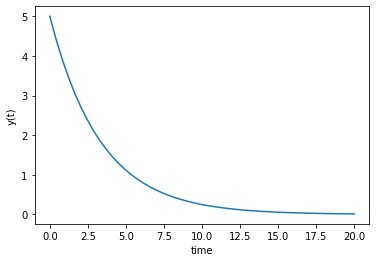

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()


In [2]:
from sympy.abc import x, t

## Phase Portraits Example 1

Matlab post An undamped pendulum with no driving force is described by

y′′+sin(y)=0
We reduce this to standard matlab form of a system of first order ODEs by letting y1=y and y2=y′1. This leads to:

y′1=y2

y′2=−sin(y1)

The phase portrait is a plot of a vector field which qualitatively shows how the solutions to these equations will go from a given starting point. here is our definition of the differential equations:

To generate the phase portrait, we need to compute the derivatives y′1 and y′2 at t=0 on a grid over the range of values for y1 and y2 we are interested in. We will plot the derivatives as a vector at each (y1, y2) which will show us the initial direction from each point. We will examine the solutions over the range -2 < y1 < 8, and -2 < y2 < 2 for y2, and create a grid of 20 x 20 points.



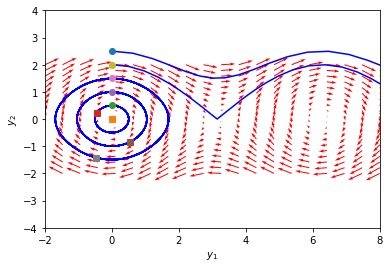

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(Y, t):
    y1, y2 = Y
    return [y2, -np.sin(y1)]

y1 = np.linspace(-2.0, 8.0, 20)
y2 = np.linspace(-2.0, 2.0, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]
        v[i,j] = yprime[1]
     

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$y_1$')
plt.ylabel('$y_2$')
plt.xlim([-2, 8])
plt.ylim([-4, 4])

from scipy.integrate import odeint

for y20 in [0, 0.5, 1, 1.5, 2, 2.5]:
    tspan = np.linspace(0, 50, 200)
    y0 = [0.0, y20]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-') # path
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
    plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end

What do these figures mean? 
For starting points near the origin, and small velocities, the pendulum goes into a stable limit cycle. 
For others, the trajectory appears to fly off into y1 space. Recall that y1 is an angle that has values from −π to π. 
The y1 data in this case is not wrapped around to be in this range.

## Phase Portraits Example 2

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
def plot_phase_portraits(func):
    y1 = np.linspace(-2.0, 2.0, 20)
    y2 = np.linspace(-2.0, 2.0, 20)
    Y1, Y2 = np.meshgrid(y1, y2)

    t = 0
    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape
    for i in range(NI):
        for j in range(NJ):
            x = Y1[i, j]
            y = Y2[i, j]
            yprime = func([x, y], t)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]

    Q = plt.quiver(Y1, Y2, u, v, color='r')

    plt.xlabel('$y_1$')
    plt.ylabel('$y_2$')
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])

    for y20 in [-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5]:
        tspan = np.linspace(0, 50, 200)
        y0 = [0.0, y20]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-') # path
        plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
        plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end

        y0 = [y20, 0.0]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-') # path
        plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
        plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end

        y0 = [y20, y20]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-') # path
        plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
        plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end

        y0 = [-y20, y20]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-') # path
        plt.plot([ys[0,0]], [ys[0,1]], 'o') # start
        plt.plot([ys[-1,0]], [ys[-1,1]], 's') # end

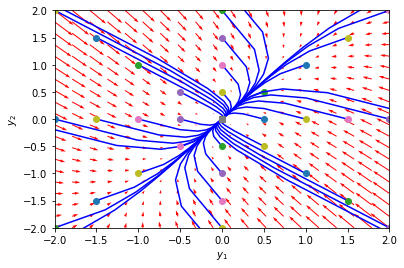

In [20]:
def f(Y, t):
    y1, y2 = Y
    return [-3*y1 + np.sqrt(2)*y2, np.sqrt(2)*y1 - 2*y2]
plot_phase_portraits(f)

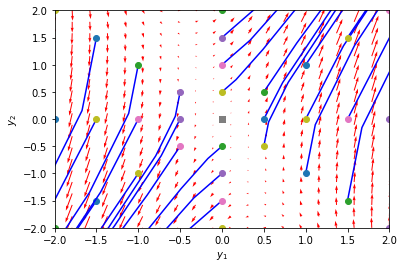

In [21]:
def f(Y, t):
    y1, y2 = Y
    return [y1 + y2, 4*y1 + y2]
plot_phase_portraits(f)

# one resource http://sam-dolan.staff.shef.ac.uk/mas212/docs/l4.pdf